In [367]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dating_data_clean = pd.read_csv('dating_data_clean.csv')
dating_data_clean.shape

(8378, 70)

In [368]:
# Drop rows with zero in like:

dating_data_clean['like'] != 0
dating_data_clean = dating_data_clean[dating_data_clean['like'] != 0]
dating_data_clean.shape

(8130, 70)

## 1. Question: How is the relation between how participants rated the partner and the like scale?

### 1.1. Relation between ratings at the night of the even and the like scale:

**- Attribute: attractive**

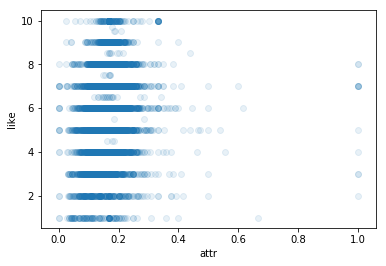

In [369]:
plt.scatter(dating_data_clean['attr'], dating_data_clean['like'], alpha=.10)
plt.xlabel('attr')
plt.ylabel('like')

plt.show()

**- Attribute: sincere:**

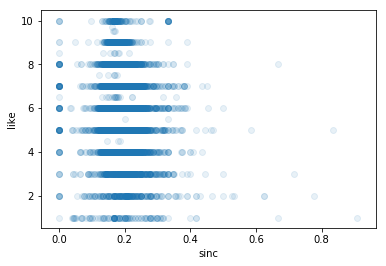

In [370]:
plt.scatter(dating_data_clean['sinc'], dating_data_clean['like'], alpha=.10)
plt.xlabel('sinc')
plt.ylabel('like')

plt.show()

**- Attribute: intelligent:**

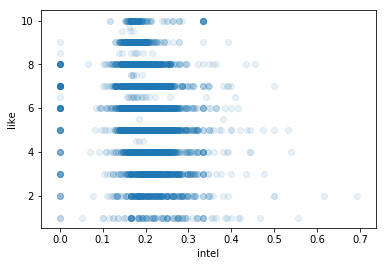

In [371]:
plt.scatter(dating_data_clean['intel'], dating_data_clean['like'], alpha=.10)
plt.xlabel('intel')
plt.ylabel('like')

plt.show()

**- Attribute: fun:**

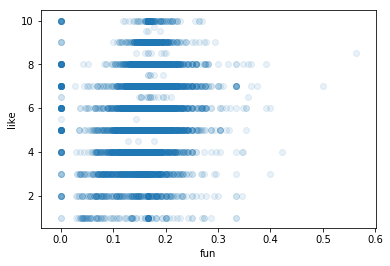

In [372]:
plt.scatter(dating_data_clean['fun'], dating_data_clean['like'], alpha=.10)
plt.xlabel('fun')
plt.ylabel('like')

plt.show()

**- Attribute: ambitious:**

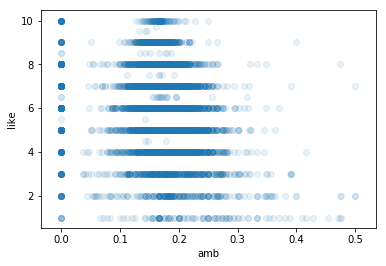

In [373]:
plt.scatter(dating_data_clean['amb'], dating_data_clean['like'], alpha=.10)
plt.xlabel('amb')
plt.ylabel('like')

plt.show()

**- Attribute: shared interests:**

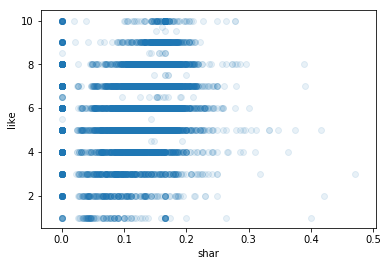

In [374]:
plt.scatter(dating_data_clean['shar'], dating_data_clean['like'], alpha=.10)
plt.xlabel('shar')
plt.ylabel('like')

plt.show()

Insight:
- as there are several rating datapoints for each like datapoint, it's difficult to identify a tendency or correlation between the 2 features

### 1.2 Relation between median of the ratings and like:

**1.2.1. Grouping ratings, calculating median and plots:**

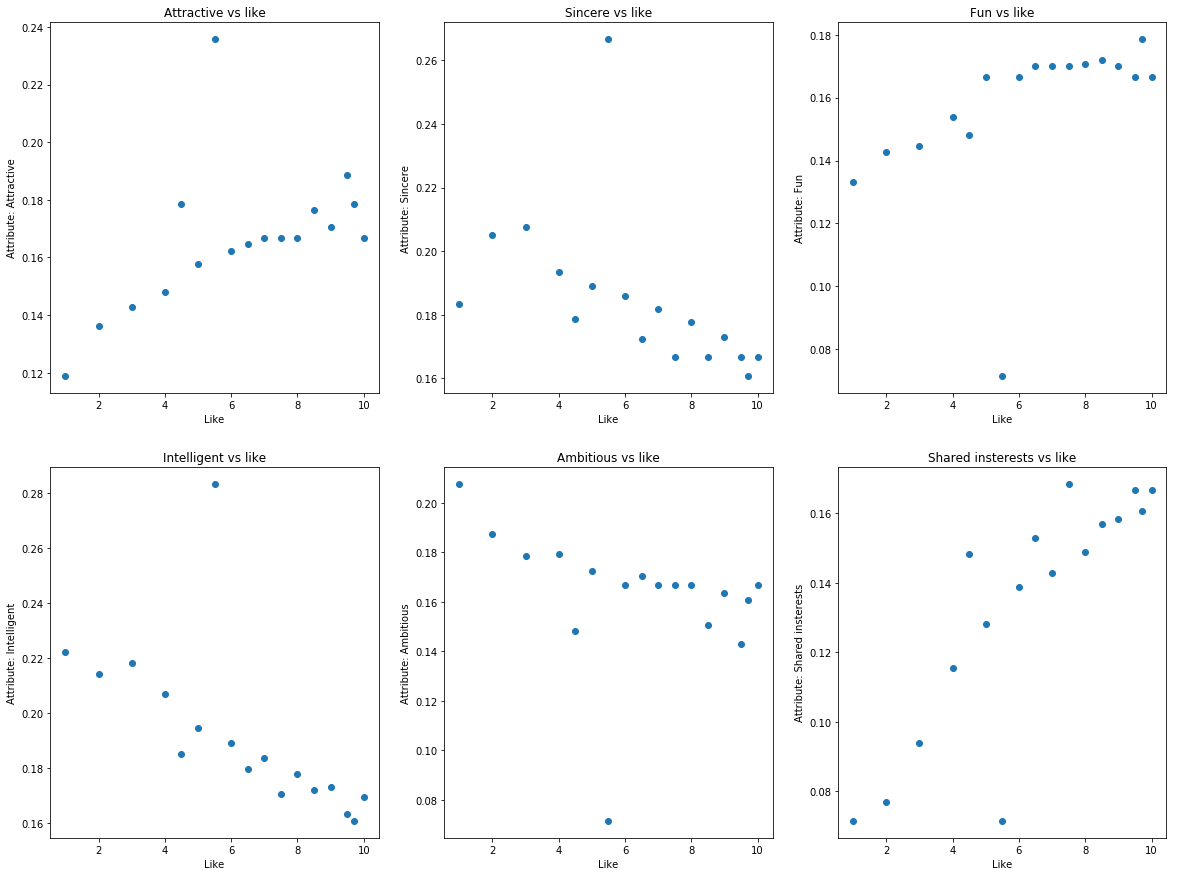

In [375]:
# grouping ratings by like:

by_like = dating_data_clean.groupby('like')

# Aggregate each attribute column of by_like by median
count_by_like_attr = by_like['attr'].median()
count_by_like_sinc = by_like['sinc'].median()
count_by_like_fun = by_like['fun'].median()
count_by_like_intel = by_like['intel'].median()
count_by_like_amb = by_like['amb'].median()
count_by_like_shar = by_like['shar'].median()

fig = plt.figure(figsize=(20,15))
ax1 = fig.add_subplot(2,3,1)
ax2 = fig.add_subplot(2,3,2)
ax3 = fig.add_subplot(2,3,3)
ax4 = fig.add_subplot(2,3,4)
ax5 = fig.add_subplot(2,3,5)
ax6 = fig.add_subplot(2,3,6)

# plots with like on x axis and attributes on y axis:

ax1.plot(count_by_like_attr, linestyle='None', marker='o')
ax1.set_title('Attractive vs like')
ax1.set_ylabel('Attribute: Attractive')
ax1.set_xlabel('Like')

ax2.plot(count_by_like_sinc, linestyle='None', marker='o')
ax2.set_title('Sincere vs like')
ax2.set_ylabel('Attribute: Sincere')
ax2.set_xlabel('Like')

ax3.plot(count_by_like_fun, linestyle='None', marker='o')
ax3.set_title('Fun vs like')
ax3.set_ylabel('Attribute: Fun')
ax3.set_xlabel('Like')

ax4.plot(count_by_like_intel, linestyle='None', marker='o')
ax4.set_title('Intelligent vs like')
ax4.set_ylabel('Attribute: Intelligent')
ax4.set_xlabel('Like')

ax5.plot(count_by_like_amb, linestyle='None', marker='o')
ax5.set_title('Ambitious vs like')
ax5.set_ylabel('Attribute: Ambitious')
ax5.set_xlabel('Like')

ax6.plot(count_by_like_shar, linestyle='None', marker='o')
ax6.set_title('Shared insterests vs like')
ax6.set_ylabel('Attribute: Shared insterests')
ax6.set_xlabel('Like')

plt.show()


**1.2.1. Combining scatter plots for ratings vs like (blue), for the median of ratings vs like (orange) and pearson correlation (r):**

- The plots below address the challenge that the previous plots had that didn't show clearly a correlation. They show some correlation between the ratings' medians and the like scale 
- The analysis below uses all the data, regardless of the decision for a second date.

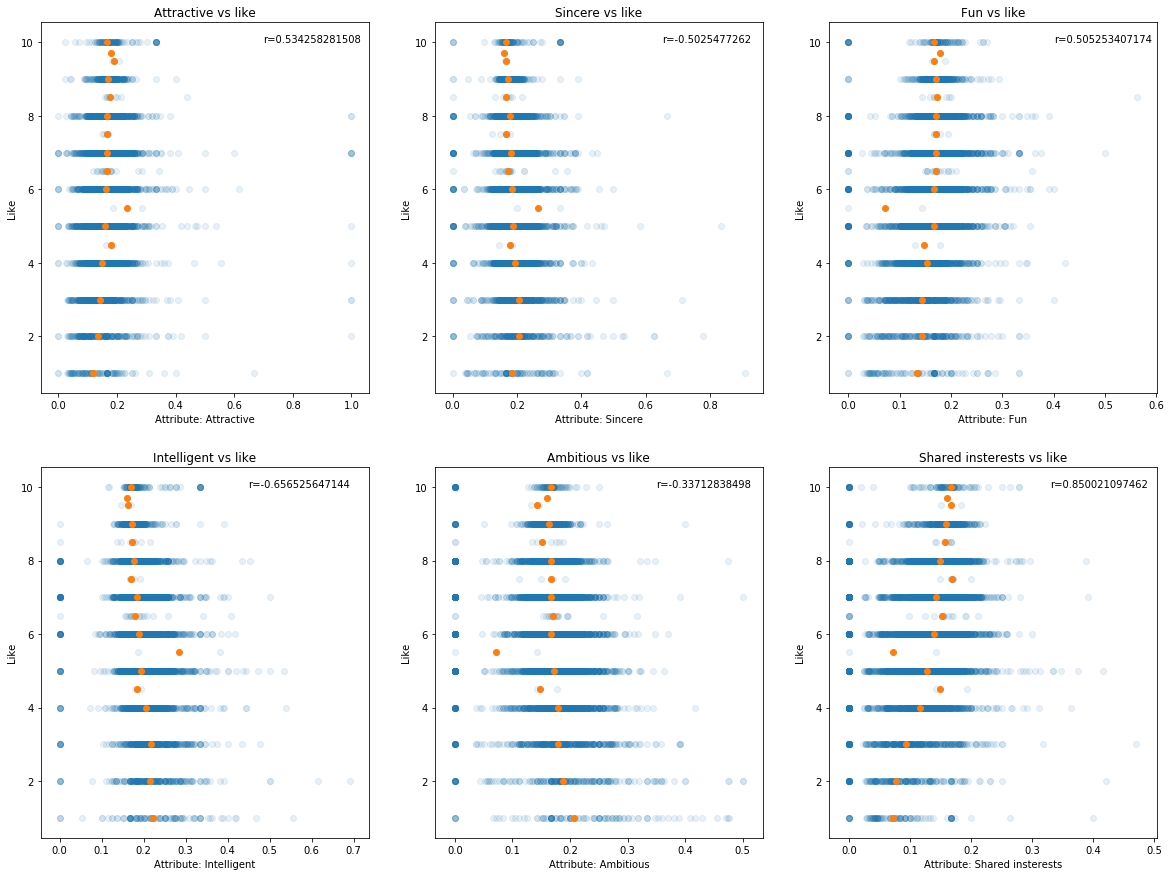

In [376]:
# Combining scatter plots for all the data (blue), for the median (orange) and pearson correlation (r):

from scipy.stats.stats import pearsonr

r_attr, p_value = pearsonr(count_by_like_attr.index, count_by_like_attr)
r_sinc, p_value = pearsonr(count_by_like_sinc.index, count_by_like_sinc)
r_fun, p_value = pearsonr(count_by_like_fun.index, count_by_like_fun)
r_intel, p_value = pearsonr(count_by_like_intel.index, count_by_like_intel)
r_amb, p_value = pearsonr(count_by_like_amb.index, count_by_like_amb)
r_shar, p_value = pearsonr(count_by_like_shar.index, count_by_like_shar)

fig = plt.figure(figsize=(20,15))
ax1 = fig.add_subplot(2,3,1)
ax2 = fig.add_subplot(2,3,2)
ax3 = fig.add_subplot(2,3,3)
ax4 = fig.add_subplot(2,3,4)
ax5 = fig.add_subplot(2,3,5)
ax6 = fig.add_subplot(2,3,6)

ax1.scatter(dating_data_clean['attr'], dating_data_clean['like'], alpha=.10)
ax1.scatter(x=count_by_like_attr, y=count_by_like_attr.index, linestyle='None', marker='o')
ax1.set_title('Attractive vs like')
ax1.set_xlabel('Attribute: Attractive')
ax1.set_ylabel('Like')
ax1.annotate('r=' + str(r_attr),xy=(0.7,10),xytext=(0.7, 10))

ax2.scatter(dating_data_clean['sinc'], dating_data_clean['like'], alpha=.10)
ax2.scatter(x=count_by_like_sinc, y=count_by_like_sinc.index, linestyle='None', marker='o')
ax2.set_title('Sincere vs like')
ax2.set_xlabel('Attribute: Sincere')
ax2.set_ylabel('Like')
ax2.annotate('r=' + str(r_sinc),xy=(0.65,10),xytext=(0.65, 10))


ax3.scatter(dating_data_clean['fun'], dating_data_clean['like'], alpha=.10)
ax3.scatter(x=count_by_like_fun, y=count_by_like_fun.index, linestyle='None', marker='o')
ax3.set_title('Fun vs like')
ax3.set_xlabel('Attribute: Fun')
ax3.set_ylabel('Like')
ax3.annotate('r=' + str(r_fun),xy=(0.4,10),xytext=(0.4, 10))

ax4.scatter(dating_data_clean['intel'], dating_data_clean['like'], alpha=.10)
ax4.scatter(x=count_by_like_intel, y=count_by_like_intel.index, linestyle='None', marker='o')
ax4.set_title('Intelligent vs like')
ax4.set_xlabel('Attribute: Intelligent')
ax4.set_ylabel('Like')
ax4.annotate('r=' + str(r_intel),xy=(0.45,10),xytext=(0.45, 10))

ax5.scatter(dating_data_clean['amb'], dating_data_clean['like'], alpha=.10)
ax5.scatter(x=count_by_like_amb, y=count_by_like_amb.index, linestyle='None', marker='o')
ax5.set_title('Ambitious vs like')
ax5.set_xlabel('Attribute: Ambitious')
ax5.set_ylabel('Like')
ax5.annotate('r=' + str(r_amb),xy=(0.35,10),xytext=(0.35, 10))

ax6.scatter(dating_data_clean['shar'], dating_data_clean['like'], alpha=.10)
ax6.scatter(x=count_by_like_shar, y=count_by_like_shar.index, linestyle='None', marker='o')
ax6.set_title('Shared insterests vs like')
ax6.set_xlabel('Attribute: Shared insterests')
ax6.set_ylabel('Like')
ax6.annotate('r=' + str(r_shar),xy=(0.33,10),xytext=(0.33, 10))

plt.show()




**Insights:**
- Attributes where ratings median has higher positive correlation with like: shared interests (r = 0.85), attractive (r = 0.534), fun (r = 0.505)
- Attributes where ratings median has negative correlation with like: intelligent (r = -0.657), sincere (r = -0.503), ambitious (r = -0.337)
- Shared interests and attractive likely play a major role in one person liking other in a first date

Question for Andrei: do I need to say "likely" when I write my conclusions?

## 2. Question: How is the relation between how participants rated the partner and the like scale for the ones who said yes to a second date (decision = yes)?

### 2.1 Scatter plot between ratings the night of the event and like scale when decision = yes:

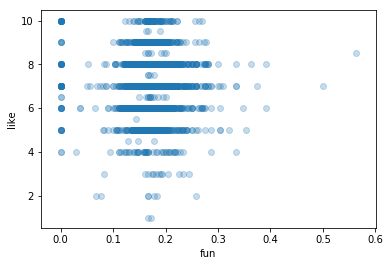

In [377]:
dec_check = dating_data_clean['dec'] == 1
dec_data_event = dating_data_clean.loc[dec_check,('attr', 'sinc', 'intel','fun','amb', 'shar', 'like')]

plt.scatter(dec_data_event['fun'], dec_data_event['like'], alpha=0.25)
plt.xlabel('fun')
plt.ylabel('like')

plt.show()

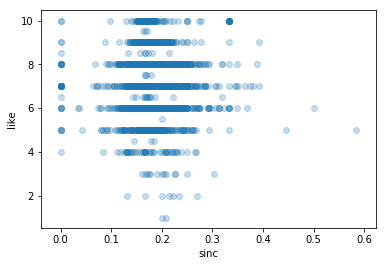

In [378]:
plt.scatter(dec_data_event['sinc'], dec_data_event['like'], alpha=0.25)
plt.xlabel('sinc')
plt.ylabel('like')

plt.show()

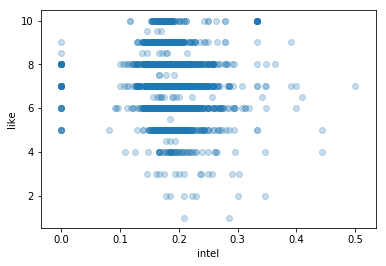

In [379]:
plt.scatter(dec_data_event['intel'], dec_data_event['like'], alpha=0.25)
plt.xlabel('intel')
plt.ylabel('like')

plt.show()

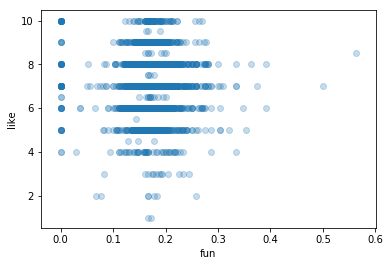

In [380]:
plt.scatter(dec_data_event['fun'], dec_data_event['like'], alpha=0.25)
plt.xlabel('fun')
plt.ylabel('like')

plt.show()

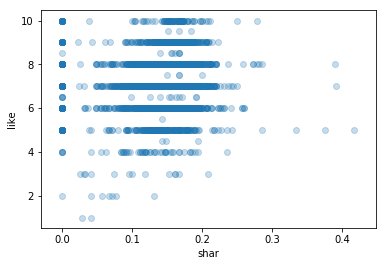

In [381]:
plt.scatter(dec_data_event['shar'], dec_data_event['like'], alpha=0.25)
plt.xlabel('shar')
plt.ylabel('like')

plt.show()

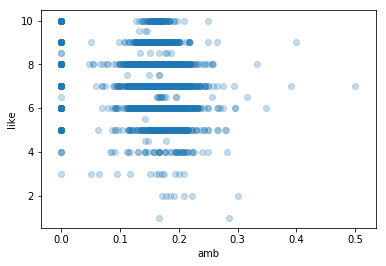

In [382]:
plt.scatter(dec_data_event['amb'], dec_data_event['like'], alpha=0.25)
plt.xlabel('amb')
plt.ylabel('like')

plt.show()

### 2.2 Using the mean of an attribute for each 'like' datapoint to see the correlation:

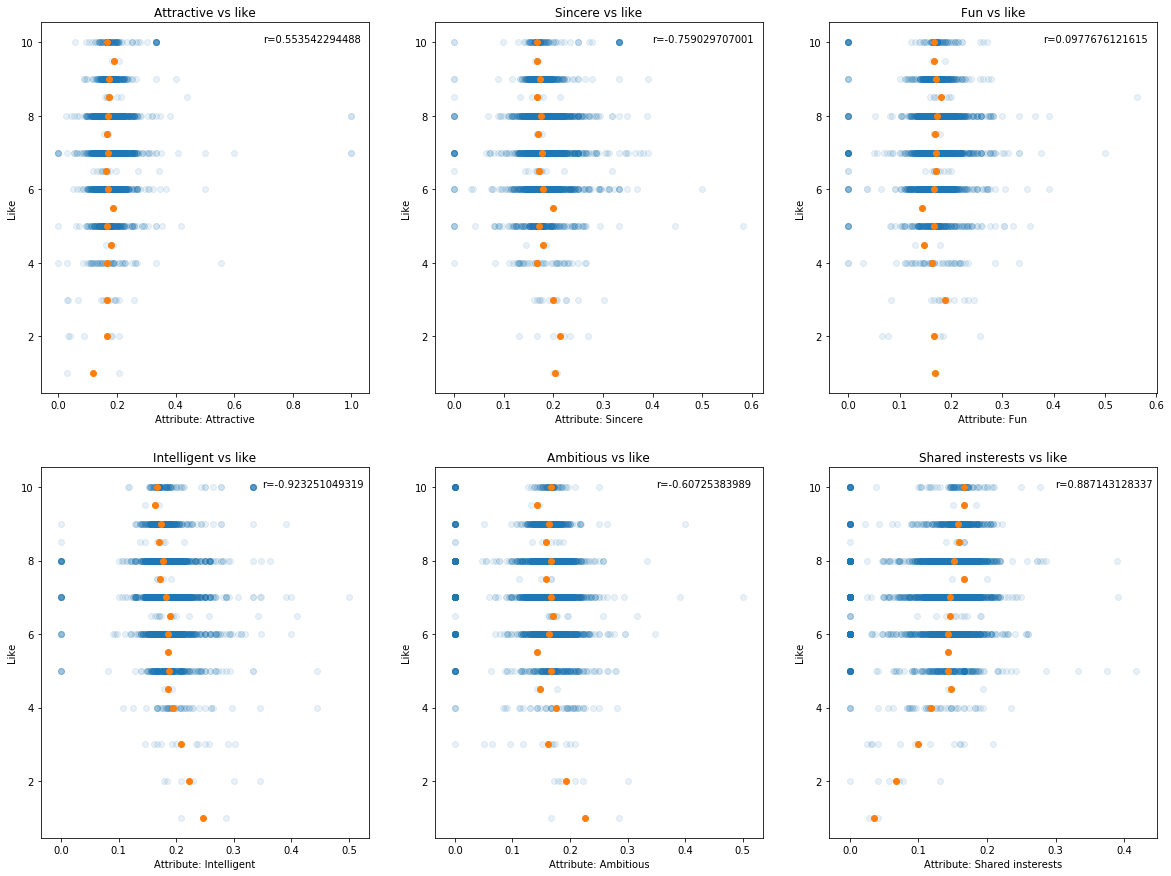

In [383]:
by_like = dec_data_event.groupby('like')

# Aggregate each attribute column of by_like by median
count_by_like_attr = by_like['attr'].median()
count_by_like_sinc = by_like['sinc'].median()
count_by_like_fun = by_like['fun'].median()
count_by_like_intel = by_like['intel'].median()
count_by_like_amb = by_like['amb'].median()
count_by_like_shar = by_like['shar'].median()

r_attr, p_value = pearsonr(count_by_like_attr.index, count_by_like_attr)
r_sinc, p_value = pearsonr(count_by_like_sinc.index, count_by_like_sinc)
r_fun, p_value = pearsonr(count_by_like_fun.index, count_by_like_fun)
r_intel, p_value = pearsonr(count_by_like_intel.index, count_by_like_intel)
r_amb, p_value = pearsonr(count_by_like_amb.index, count_by_like_amb)
r_shar, p_value = pearsonr(count_by_like_shar.index, count_by_like_shar)

fig = plt.figure(figsize=(20,15))
ax1 = fig.add_subplot(2,3,1)
ax2 = fig.add_subplot(2,3,2)
ax3 = fig.add_subplot(2,3,3)
ax4 = fig.add_subplot(2,3,4)
ax5 = fig.add_subplot(2,3,5)
ax6 = fig.add_subplot(2,3,6)

ax1.scatter(dec_data_event['attr'], dec_data_event['like'], alpha=.10)
ax1.scatter(x=count_by_like_attr, y=count_by_like_attr.index, linestyle='None', marker='o')
ax1.set_title('Attractive vs like')
ax1.set_xlabel('Attribute: Attractive')
ax1.set_ylabel('Like')
ax1.annotate('r=' + str(r_attr),xy=(0.7,10),xytext=(0.7, 10))

ax2.scatter(dec_data_event['sinc'], dec_data_event['like'], alpha=.10)
ax2.scatter(x=count_by_like_sinc, y=count_by_like_sinc.index, linestyle='None', marker='o')
ax2.set_title('Sincere vs like')
ax2.set_xlabel('Attribute: Sincere')
ax2.set_ylabel('Like')
ax2.annotate('r=' + str(r_sinc),xy=(0.4,10),xytext=(0.4, 10))


ax3.scatter(dec_data_event['fun'], dec_data_event['like'], alpha=.10)
ax3.scatter(x=count_by_like_fun, y=count_by_like_fun.index, linestyle='None', marker='o')
ax3.set_title('Fun vs like')
ax3.set_xlabel('Attribute: Fun')
ax3.set_ylabel('Like')
ax3.annotate('r=' + str(r_fun),xy=(0.38,10),xytext=(0.38, 10))

ax4.scatter(dec_data_event['intel'], dec_data_event['like'], alpha=.10)
ax4.scatter(x=count_by_like_intel, y=count_by_like_intel.index, linestyle='None', marker='o')
ax4.set_title('Intelligent vs like')
ax4.set_xlabel('Attribute: Intelligent')
ax4.set_ylabel('Like')
ax4.annotate('r=' + str(r_intel),xy=(0.35,10),xytext=(0.35, 10))

ax5.scatter(dec_data_event['amb'], dec_data_event['like'], alpha=.10)
ax5.scatter(x=count_by_like_amb, y=count_by_like_amb.index, linestyle='None', marker='o')
ax5.set_title('Ambitious vs like')
ax5.set_xlabel('Attribute: Ambitious')
ax5.set_ylabel('Like')
ax5.annotate('r=' + str(r_amb),xy=(0.35,10),xytext=(0.35, 10))

ax6.scatter(dec_data_event['shar'], dec_data_event['like'], alpha=.10)
ax6.scatter(x=count_by_like_shar, y=count_by_like_shar.index, linestyle='None', marker='o')
ax6.set_title('Shared insterests vs like')
ax6.set_xlabel('Attribute: Shared insterests')
ax6.set_ylabel('Like')
ax6.annotate('r=' + str(r_shar),xy=(0.30,10),xytext=(0.30, 10))

plt.show()

**Insights:**

- Attributes where ratings median has higher positive correlation with like: shared interests (r = 0.887), attractive (r = 0.554)
- Attributes where ratings median has negative correlation with like: intelligent (r = -0.923), sincere (r = -0.759), ambitious (r = -0.607)
- Attribute fun had a stronger positive correlation when analyzing both participants that said yes and no (r = 0.505). For participants that said yes to a 2nd date, attribute fun has a weak positive correlation (r = 0.098). 
- Shared interests and attractive likely play a major role in a decision for a second date.
- Fun highly influences if a person likes another one in the first date, but it doesn't seem to be relevant in the decision for a second date


### 2.3 Ratings distribution when decision = yes

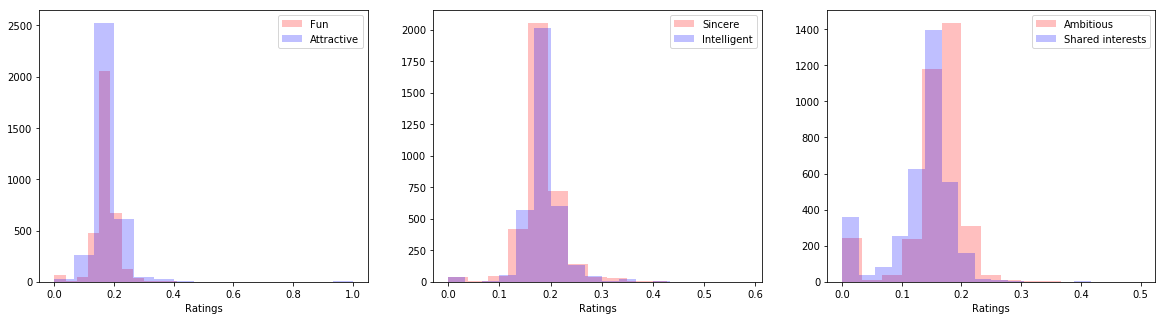

In [384]:
fig = plt.figure(figsize=(20,5))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

ax1.hist(dec_data_event['fun'], bins=15, color='red', alpha=0.25, label='Fun')
ax1.hist(dec_data_event['attr'], bins=15, color='blue', alpha=0.25, label='Attractive')
ax1.legend(loc='upper right')
ax1.set_xlabel('Ratings')

ax2.hist(dec_data_event['sinc'], bins=15, color='red', alpha=0.25, label='Sincere')
ax2.hist(dec_data_event['intel'], bins=15, color='blue', alpha=0.25, label='Intelligent')
ax2.legend(loc='upper right')
ax2.set_xlabel('Ratings')

ax3.hist(dec_data_event['amb'], bins=15, color='red', alpha=0.25, label='Ambitious')
ax3.hist(dec_data_event['shar'], bins=15, color='blue', alpha=0.25, label='Shared interests')
ax3.legend(loc='upper right')
ax3.set_xlabel('Ratings')



plt.show()



In [385]:
dec_data_event.describe()

,attr,sinc,intel,fun,amb,shar,like
count,3501.000000,3501.000000,3501.000000,3501.000000,3501.000000,3501.000000,3501.000000
mean,0.175837,0.179777,0.183482,0.170709,0.155295,0.134328,7.222079
std,0.048919,0.039845,0.037531,0.039198,0.050874,0.055564,1.318612
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.155556,0.163265,0.166667,0.157895,0.146341,0.120000,6.000000
50%,0.170213,0.175000,0.179487,0.170213,0.166667,0.148936,7.000000
75%,0.190476,0.195122,0.195122,0.186047,0.179487,0.166667,8.000000
max,1.000000,0.583333,0.500000,0.562500,0.500000,0.416667,10.000000


## 3. Question: how much you need to like a person in order to go for a second date?

### 3.1 Histogram for ratings and like when decision = yes:

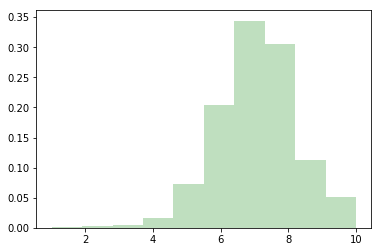

In [386]:
dec_check = dating_data_clean['dec'] == 1
dec_data_yes = dating_data_clean.loc[dec_check,('dec', 'like')]
plt.hist(dec_data_yes['like'],normed=True, bins=10, alpha=0.25, color='green')

plt.show()

In [387]:
dec_data_yes.describe()

,dec,like
count,3501.0,3501.000000
mean,1.0,7.222079
std,0.0,1.318612
min,1.0,1.000000
25%,1.0,6.000000
50%,1.0,7.000000
75%,1.0,8.000000
max,1.0,10.000000


### 3.2 Histogram for ratings and like when decision = No:

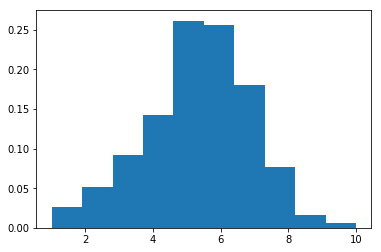

In [388]:
dec_check = dating_data_clean['dec'] == 0
dec_data_no = dating_data_clean.loc[dec_check,('dec', 'like')]
plt.hist(dec_data_no['like'],normed=True, bins=10)

plt.show()

In [389]:
dec_data_no.describe()

,dec,like
count,4629.0,4629.000000
mean,0.0,5.321819
std,0.0,1.739407
min,0.0,1.000000
25%,0.0,4.000000
50%,0.0,5.000000
75%,0.0,7.000000
max,0.0,10.000000


**Insights:**

- Like needs to be high for someone to decide for a 2nd date (left skewed distribution)
- Considering like is a scale of 1 to 10:
    - For decision = yes: mean - 7.22, median - 7
    - For decision = no: mean - 5.32, median - 5)


### 3.3 Kernel density estimate:

Note:
- Dec = 0 is 'no' for a 2nd date
- Dec = 1 is 'yes' for a 2nd date

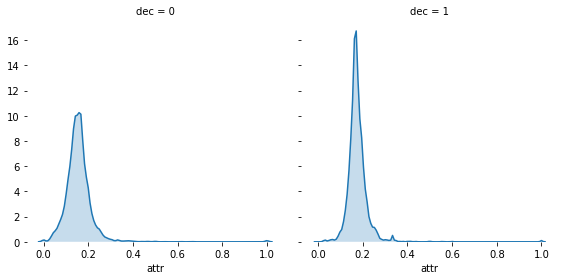

In [390]:
g = sns.FacetGrid(dating_data_clean, col="dec", size=4)
g.map(sns.kdeplot, "attr", shade=True)

sns.despine(left=True, bottom=True)

plt.show()

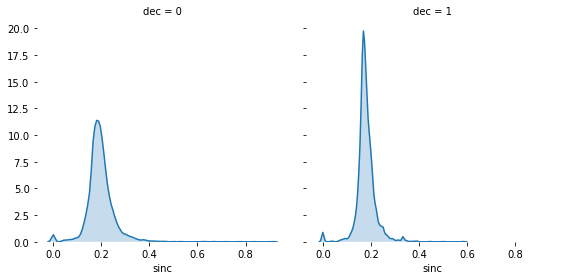

In [391]:
g = sns.FacetGrid(dating_data_clean, col="dec", size=4)
g.map(sns.kdeplot, "sinc", shade=True)

sns.despine(left=True, bottom=True)

plt.show()



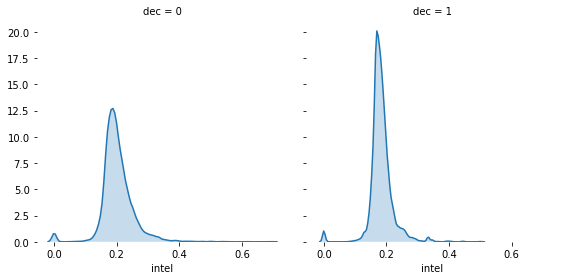

In [392]:
g = sns.FacetGrid(dating_data_clean, col="dec", size=4)
g.map(sns.kdeplot, "intel", shade=True)

sns.despine(left=True, bottom=True)

plt.show()

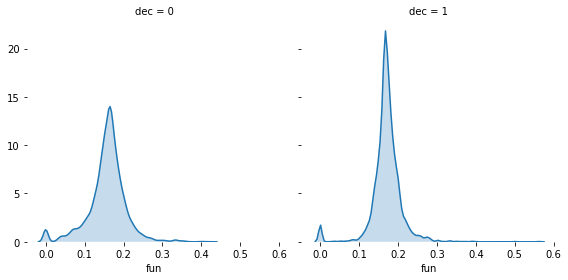

In [393]:
g = sns.FacetGrid(dating_data_clean, col="dec", size=4)
g.map(sns.kdeplot, "fun", shade=True)

sns.despine(left=True, bottom=True)

plt.show()

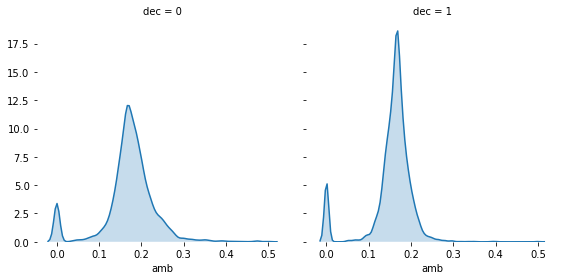

In [394]:
g = sns.FacetGrid(dating_data_clean, col="dec", size=4)
g.map(sns.kdeplot, "amb", shade=True)

sns.despine(left=True, bottom=True)

plt.show()

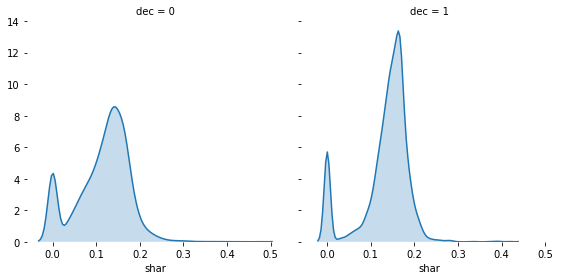

In [395]:
g = sns.FacetGrid(dating_data_clean, col="dec", size=4)
g.map(sns.kdeplot, "shar", shade=True)

sns.despine(left=True, bottom=True)

plt.show()

Question to Andrei: what exactly the plots above are showing?

## 4. Question: does the distance between what is important for the couple at sign up has any impact on the decion for a second date?

### 4.1 Calculating Euclidean distance:

In [396]:
dis_att = (dating_data_clean['pf_o_att'] - dating_data_clean['attr1_1'])**2
dis_sinc = (dating_data_clean['pf_o_sin'] - dating_data_clean['sinc1_1'])**2
dis_intel = (dating_data_clean['pf_o_int'] - dating_data_clean['intel1_1'])**2
dis_fun = (dating_data_clean['pf_o_fun'] - dating_data_clean['fun1_1'])**2
dis_amb = (dating_data_clean['pf_o_amb'] - dating_data_clean['amb1_1'])**2
dis_shared = (dating_data_clean['pf_o_sha'] - dating_data_clean['shar1_1'])**2
dist_signup = (dis_att + dis_sinc + dis_intel + dis_fun + dis_amb + dis_shared) ** 1/2
dating_data_clean['dist_signup'] = dist_signup



**Statistics for distance column:**

In [397]:
dating_data_clean['dist_signup'].describe()

count    8130.000000
mean        0.039219
std         0.052264
min         0.000000
25%         0.010000
50%         0.022500
75%         0.047500
max         0.504132
Name: dist_signup, dtype: float64

### 4.2. Plots for distance:

**4.2.1 Scatter plot between distance and like:**

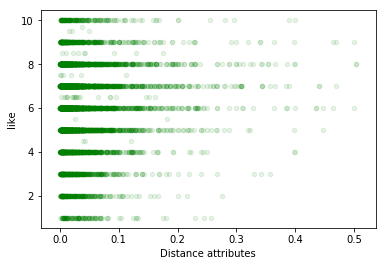

In [398]:
plt.scatter(dating_data_clean['dist_signup'], dating_data_clean['like'], alpha=.10, marker=".", s = 80, color='green')
plt.xlabel('Distance attributes')
plt.ylabel('like')

plt.show()

**4.2.2. Scatter plot between distance median and like + pearson correlation:**

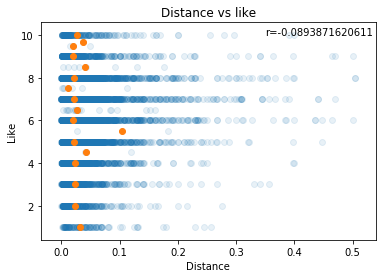

In [399]:
by_like = dating_data_clean.groupby('like')

# Aggregate distance column of by_like by median
count_by_like_dist = by_like['dist_signup'].median()


r_dist, p_value = pearsonr(count_by_like_dist.index, count_by_like_dist)

fig, ax = plt.subplots()

ax.scatter(dating_data_clean['dist_signup'], dating_data_clean['like'], alpha=.10)
ax.scatter(x=count_by_like_dist, y=count_by_like_dist.index, linestyle='None', marker='o')
ax.set_title('Distance vs like')
ax.set_xlabel('Distance')
ax.set_ylabel('Like')
ax.annotate('r=' + str(r_dist),xy=(0.35,10),xytext=(0.35, 10))


plt.show()

### 4.3 Plots for distance based on decision:

**4.3.1 Histogram for distances that have match = yes:**

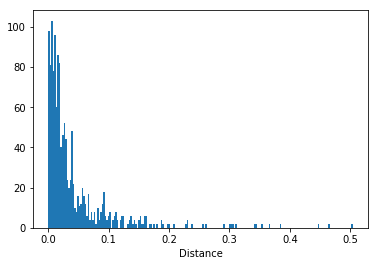

In [400]:
dating_match = dating_data_clean[dating_data_clean['match'] == 1]
plt.hist(dating_match['dist_signup'], bins=200)
plt.xlabel('Distance')

plt.show()

In [401]:
dating_match['dist_signup'].describe()

count    1376.000000
mean        0.043757
std         0.062927
min         0.000000
25%         0.010000
50%         0.020350
75%         0.049325
max         0.504132
Name: dist_signup, dtype: float64

Keeping one record for each couple, brings the same result, as expected:

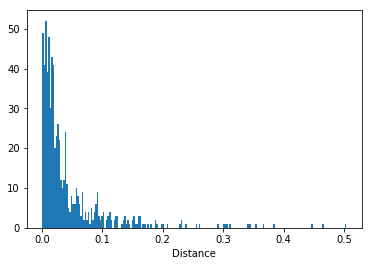

In [402]:
dating_data_clean['iid'] = dating_data_clean['iid'].astype('str')
dating_data_clean['pid'] = dating_data_clean['pid'].astype('int32')
dating_data_clean['pid'] = dating_data_clean['pid'].astype('str')

combinations = {}

for idx in dating_data_clean.index:
    combination1 = dating_data_clean.loc[idx,'iid'] + "-" + dating_data_clean.loc[idx,'pid']
    combination2 = dating_data_clean.loc[idx,'pid'] + "-" + dating_data_clean.loc[idx,'iid']
    if combination1 not in combinations:
        combinations[combination2] = idx 

data_couples = dating_data_clean.loc[combinations.values(),:]

dating_match = data_couples[data_couples['match'] == 1]
plt.hist(dating_match['dist_signup'], bins=200)
plt.xlabel('Distance')

plt.show()



In [403]:
dating_match['dist_signup'].describe()

count    690.000000
mean       0.043722
std        0.062879
min        0.000000
25%        0.010000
50%        0.020350
75%        0.049375
max        0.504132
Name: dist_signup, dtype: float64

**4.3.2 Histogram for distances that have match = no:**

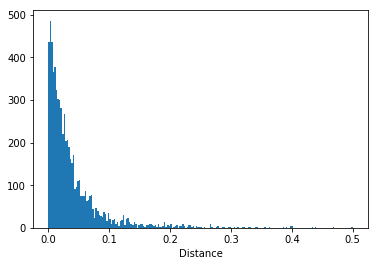

In [404]:
dating_no_match = dating_data_clean[dating_data_clean['match'] == 0]
plt.hist(dating_no_match['dist_signup'], bins=200)
plt.xlabel('Distance')

plt.show()

## match = no has a higher volume

In [405]:
dating_no_match['dist_signup'].describe()

count    6754.000000
mean        0.038295
std         0.049767
min         0.000000
25%         0.010000
50%         0.022500
75%         0.047500
max         0.500000
Name: dist_signup, dtype: float64

**Boxplots for distance based on decision:**

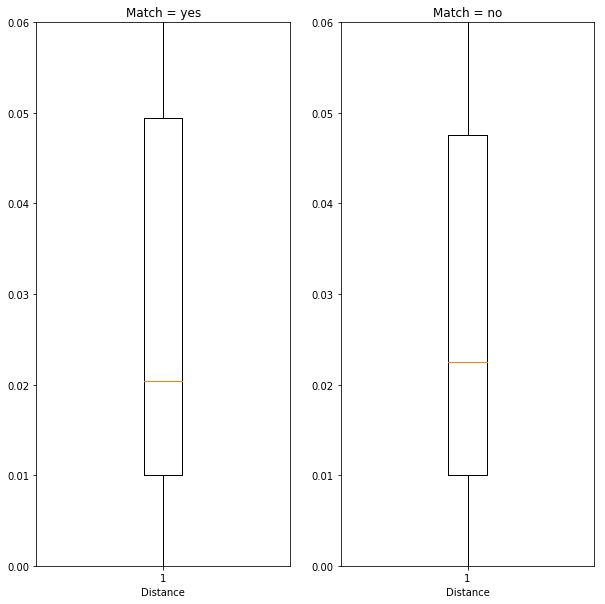

In [406]:
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.boxplot(dating_match['dist_signup'])
ax2.boxplot(dating_no_match['dist_signup'])
ax1.set_ylim([0,0.06])
ax2.set_ylim([0,0.06])
ax1.set_title('Match = yes')
ax2.set_title('Match = no')

ax1.set_xlabel('Distance')
ax2.set_xlabel('Distance')


plt.show()

**Kernel density for distance based on decision:**

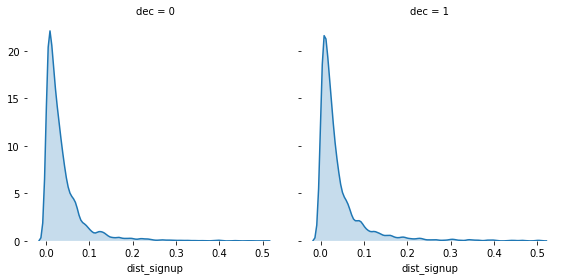

In [407]:
g = sns.FacetGrid(dating_data_clean, col="dec", size=4)
g.map(sns.kdeplot, "dist_signup", shade=True)

sns.despine(left=True, bottom=True)

plt.show()

**Cosine similarity**

In [411]:
from scipy import spatial

dating_data_clean['dist_signup']
dating_data_clean['like']
distance = spatial.distance.cosine(dating_data_clean['dist_signup'], dating_data_clean['like'])
similarity = 1 - distance

# Question to Andrei: does 0.58 mean there is some similarity?

**Insight:**
- Purpose of analysis above is to measure if distance between attributes rating at sign up (before the event) drive both participants to like each other and say yes for a 2nd date
- Weak negative correlation between distance and like
- distance median for match = yes is slightly lower than for match = no